In [277]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

<IPython.core.display.Javascript object>


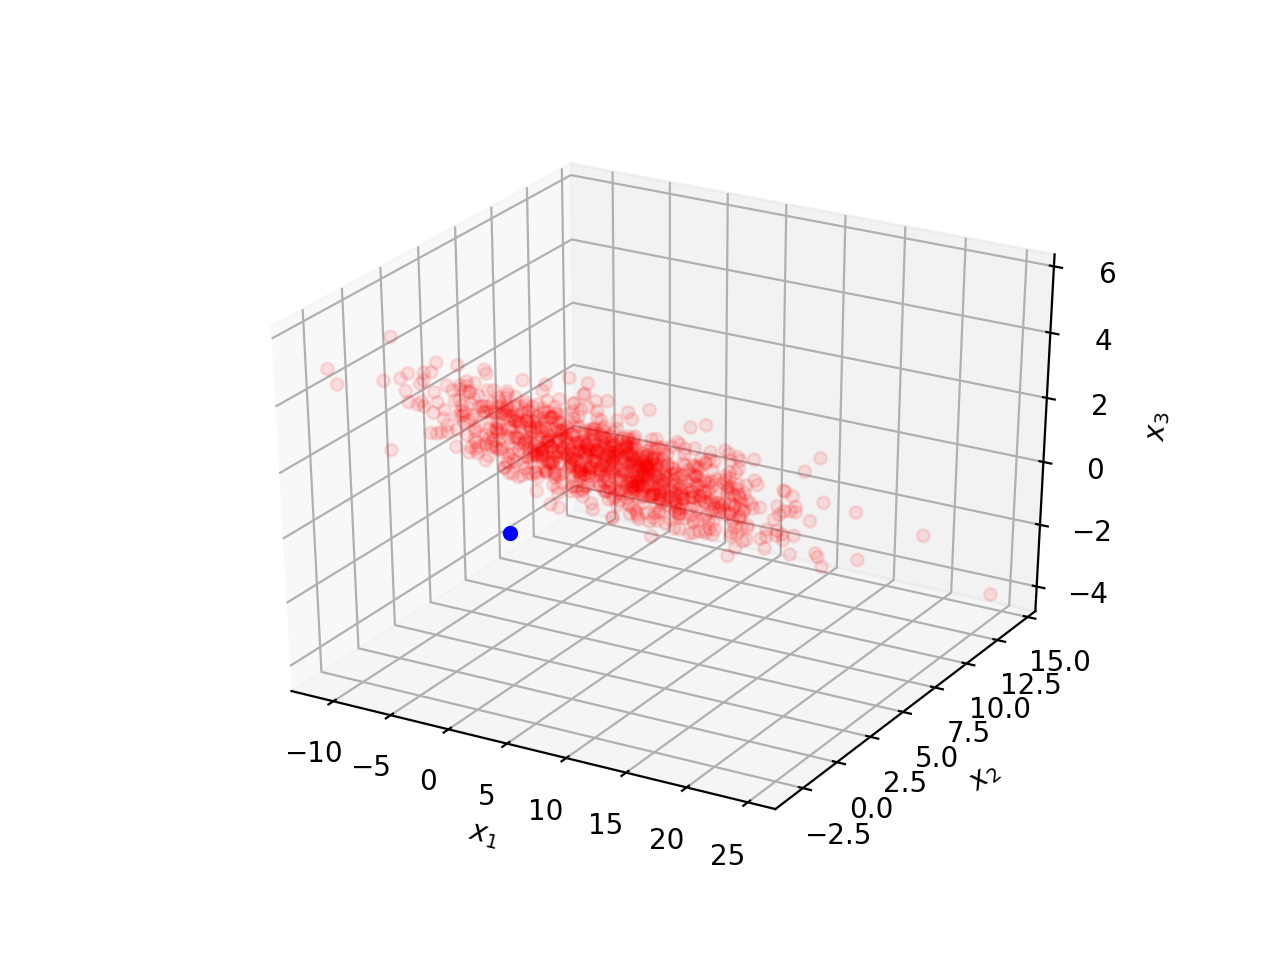

In [278]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [279]:
# Subtract mean
X_m = X - np.mean(X, 0)

<IPython.core.display.Javascript object>


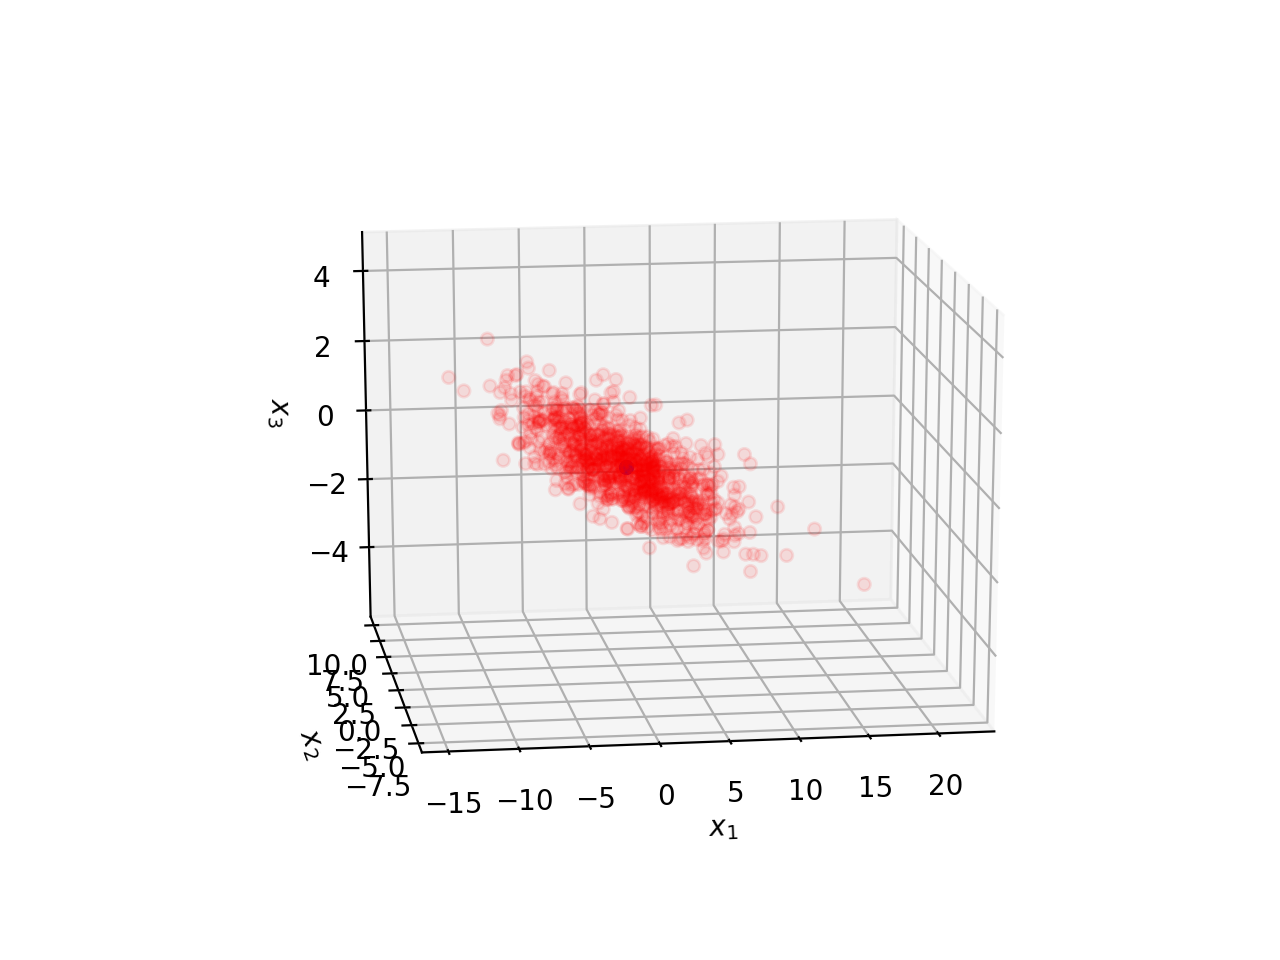

In [4]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [280]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a1 = VT.transpose()[ : , [0]]
a2 = VT.transpose()[ : , [1]]
s_2 = s
s_2[2]=0
s_2 = np.diag(s_2)
X_rank_2 = U@s_2@VT

<IPython.core.display.Javascript object>


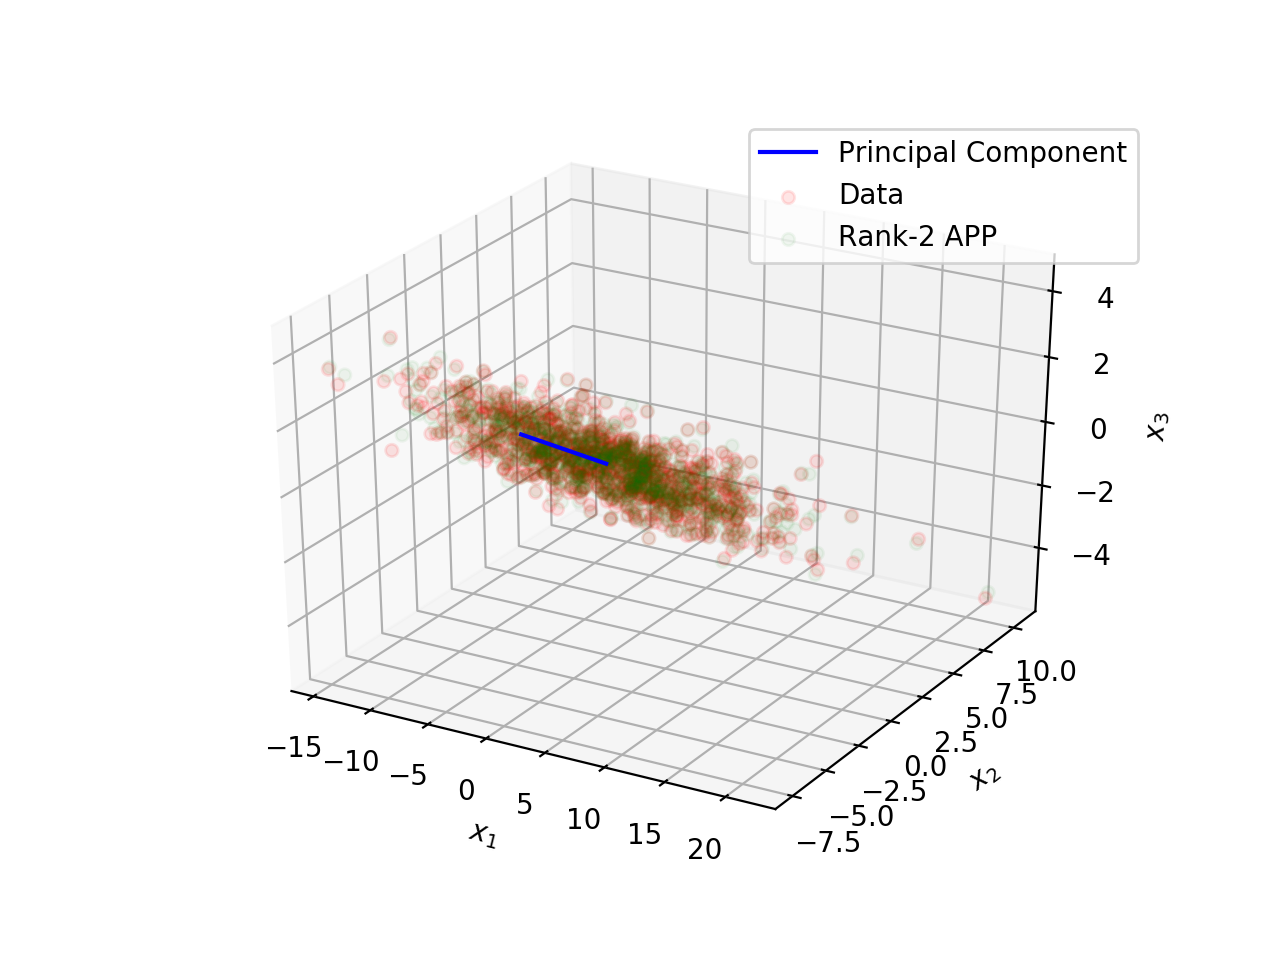

In [281]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)
ax.scatter(X_rank_2[:,0], X_rank_2[:,1], X_rank_2[:,2], c='g', marker='o', label='Rank-2 APP', alpha=0.05)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

In [287]:
#3 load the face_emotion_data
in_data = loadmat('face_emotion_data.mat') 
y = in_data['y']
X = in_data['X']

In [288]:
X_sets = []
y_sets = []
X_sets.append([-1])
y_sets.append([-1])
for i in range(1, 9):
    X_sets.append(np.split(X, 8)[i-1])
    y_sets.append(np.split(y, 8)[i-1])

In [289]:
def invsv(array, num):
    temp = array
    for n in range(num):
        temp[n] = 1/array[n]
    return temp

In [290]:
#Truncated SVD
print("3.a) Truncated SVD")
avg_error_rate = 0
for i in range(1,9):
    X_test = X_sets[i]
    y_test = y_sets[i]
    for j in range(1,9):
        if i != j:
            X_selectR = X_sets[j]
            y_selectR = y_sets[j]
            temp_X_train = X_sets[0:9]
            temp_y_train = y_sets[0:9]
            if i > j:
                temp_X_train.pop(i)
                temp_X_train.pop(j)
                temp_y_train.pop(i)
                temp_y_train.pop(j)
            else:
                temp_X_train.pop(j)
                temp_X_train.pop(i)
                temp_y_train.pop(j)
                temp_y_train.pop(i)
            temp_X_train.pop(0)
            temp_y_train.pop(0)
            X_train = np.concatenate(temp_X_train)
            y_train = np.concatenate(temp_y_train)
            
            bestR = 1
            min_error_rate = 1;
            for r in range (1,10):
                U,s,VT = np.linalg.svd(X_train, full_matrices=False)
                s_truncated = s
                for k in range (r,9):        
                    s_truncated[k] =0   
                inv_s_truncated=np.diag(invsv(s_truncated, r))
                w = VT.transpose()@inv_s_truncated@U.transpose()@y_train
                y_estimated = X_selectR@w
                error_count = np.sum(np.sign(y_estimated) != y_selectR)
                if error_count/96 < min_error_rate:
                    min_error_rate = error_count/96
                    bestR = r   
                    bestW = w
            print("[set " + str(i) + "] test, [set " + str(j) + "] select rank; " + "best rank: " + str(bestR) + ", error rate: " + str(min_error_rate))
            
            y_estimated = X_test@bestW
            error_count = np.sum(np.sign(y_estimated) != y_test)
            avg_error_rate += error_count/16
avg_error_rate = avg_error_rate/56
print()
print("Average error rate of 56 runs: " + str(avg_error_rate))

3.a) Truncated SVD
[set 1] test, [set 2] select rank; best rank: 4, error rate: 0.0
[set 1] test, [set 3] select rank; best rank: 5, error rate: 0.0208333333333
[set 1] test, [set 4] select rank; best rank: 5, error rate: 0.0104166666667
[set 1] test, [set 5] select rank; best rank: 5, error rate: 0.0
[set 1] test, [set 6] select rank; best rank: 1, error rate: 0.0104166666667
[set 1] test, [set 7] select rank; best rank: 4, error rate: 0.0
[set 1] test, [set 8] select rank; best rank: 4, error rate: 0.0
[set 2] test, [set 1] select rank; best rank: 5, error rate: 0.0208333333333
[set 2] test, [set 3] select rank; best rank: 7, error rate: 0.0208333333333
[set 2] test, [set 4] select rank; best rank: 5, error rate: 0.0
[set 2] test, [set 5] select rank; best rank: 2, error rate: 0.0
[set 2] test, [set 6] select rank; best rank: 1, error rate: 0.0104166666667
[set 2] test, [set 7] select rank; best rank: 4, error rate: 0.0
[set 2] test, [set 8] select rank; best rank: 5, error rate: 0.0

In [291]:
#Ridge Regression
print("3.b) Ridge Regression")
avg_error_rate = 0
for i in range(1,9):
    X_test = X_sets[i]
    y_test = y_sets[i]
    for j in range(1,9):
        if i != j:
            X_selectR = X_sets[j]
            y_selectR = y_sets[j]
            temp_X_train = X_sets[0:9]
            temp_y_train = y_sets[0:9]
            if i > j:
                temp_X_train.pop(i)
                temp_X_train.pop(j)
                temp_y_train.pop(i)
                temp_y_train.pop(j)
            else:
                temp_X_train.pop(j)
                temp_X_train.pop(i)
                temp_y_train.pop(j)
                temp_y_train.pop(i)
            temp_X_train.pop(0)
            temp_y_train.pop(0)
            X_train = np.concatenate(temp_X_train)
            y_train = np.concatenate(temp_y_train)
            
            lamda = [0, 0.5, 1, 2, 4, 8, 16]
            I = np.diag(np.ones(9))
            best_lamda = lamda[0]
            min_error_rate = 1;
            for l in lamda:
                #l = lamda[r]
                U,s,VT = np.linalg.svd(X_train, full_matrices=False)
                s = np.diag(s)
                w = VT.transpose()@np.linalg.inv(s@s + l*I)@s@U.transpose()@y_train
                y_estimated = X_selectR@w
                error_count = np.sum(np.sign(y_estimated) != y_selectR)
                if (error_count/96) < min_error_rate:
                    min_error_rate = error_count/96
                    best_lamda = l  
                    bestW = w
            print("[set " + str(i) + "] test, [set " + str(j) + "] select lamda; " + "best lamda: " + str(best_lamda) + ", error rate: " + str(min_error_rate))
            
            y_estimated = X_test@bestW
            error_count = np.sum(np.sign(y_estimated) != y_test)
            avg_error_rate += error_count/16
            
avg_error_rate = avg_error_rate/56
print()
print("Average error rate of 56 runs: " + str(avg_error_rate))

3.b) Ridge Regression
[set 1] test, [set 2] select lamda; best lamda: 0, error rate: 0.0104166666667
[set 1] test, [set 3] select lamda; best lamda: 8, error rate: 0.0104166666667
[set 1] test, [set 4] select lamda; best lamda: 0, error rate: 0.0104166666667
[set 1] test, [set 5] select lamda; best lamda: 0, error rate: 0.0
[set 1] test, [set 6] select lamda; best lamda: 0, error rate: 0.0104166666667
[set 1] test, [set 7] select lamda; best lamda: 0.5, error rate: 0.0
[set 1] test, [set 8] select lamda; best lamda: 0, error rate: 0.0
[set 2] test, [set 1] select lamda; best lamda: 0, error rate: 0.0208333333333
[set 2] test, [set 3] select lamda; best lamda: 0, error rate: 0.0208333333333
[set 2] test, [set 4] select lamda; best lamda: 0, error rate: 0.0
[set 2] test, [set 5] select lamda; best lamda: 0, error rate: 0.0
[set 2] test, [set 6] select lamda; best lamda: 0, error rate: 0.0104166666667
[set 2] test, [set 7] select lamda; best lamda: 0.5, error rate: 0.0
[set 2] test, [set 